# A/B Testing Assignment

In [21]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';`.

In [2]:
abs = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [3]:
abs.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [5]:
abs.shape

(740, 21)

## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [9]:
# Confidence interval

confidence_interval = stats.t.interval(.9999, 740-1, abs['Body mass index'].mean() , stats.sem(abs['Body mass index']))
print(confidence_interval)

(26.060755183286066, 27.293298870767988)


### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

(array([ 2.,  5., 11., 17., 20., 19., 12.,  8.,  4.,  2.]),
 array([26.32162162, 26.40135135, 26.48108108, 26.56081081, 26.64054054,
        26.72027027, 26.8       , 26.87972973, 26.95945946, 27.03918919,
        27.11891892]),
 <a list of 10 Patch objects>)

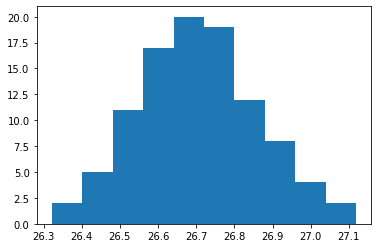

In [13]:
means = [];
for i in range(100):
  sample = np.random.choice(abs['Body mass index'],740,replace=True)
  means.append(sample.mean())

plt.hist(means)

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [18]:
# Splitting the data into two groups
drink_yes = abs[(abs['Social drinker']==1)]
drink_yes.info()
drink_no = abs[(abs['Social drinker']==0)]
drink_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 738
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               420 non-null    int64  
 1   Reason for absence               420 non-null    int64  
 2   Month of absence                 420 non-null    int64  
 3   Day of the week                  420 non-null    int64  
 4   Seasons                          420 non-null    int64  
 5   Transportation expense           420 non-null    int64  
 6   Distance from Residence to Work  420 non-null    int64  
 7   Service time                     420 non-null    int64  
 8   Age                              420 non-null    int64  
 9   Work load Average/day            420 non-null    float64
 10  Hit target                       420 non-null    int64  
 11  Disciplinary failure             420 non-null    int64  
 12  Education             

### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

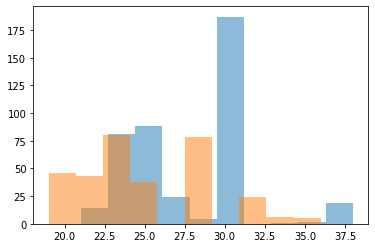

In [19]:
plt.hist(drink_yes['Body mass index'], alpha=.5)
plt.hist(drink_no['Body mass index'], alpha=.5)
plt.show()

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [23]:
stats.ttest_ind(drink_yes['Body mass index'], drink_no['Body mass index'])

Ttest_indResult(statistic=9.302990833389606, pvalue=1.5203894201359724e-19)

## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

In [22]:
# Confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Confidence interval for aircon    

get_95_ci(drink_yes['Body mass index'], drink_no['Body mass index']) 

'The difference in means at the 95% confidence interval (two-tail) is between -3.390677184812264 and -2.2105132913782177.'